In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터셋을 train, test 로 분류 
from sklearn.linear_model import LogisticRegression
#LogisticRegression 모델 사용 
from sklearn.metrics import accuracy_score
#정확도 평가
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
#정규화
from sklearn.preprocessing import LabelEncoder
# 컬럼 인코딩 변경 
from lightgbm import LGBMClassifier
#light GBM 모델 사용 
from lightgbm import plot_importance
# light gbm 모델 시각화 모듈 
from matplotlib import font_manager, rc
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5
import matplotlib.pyplot as plt

In [11]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [12]:
num_df = pd.read_csv("C:/data/num.csv")
num_df.head()

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,결산연도,결산월,폐업_유무
0,1018100340,2021-12-31,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,...,1.000000e+12,3.497900e+01,1.000000e+12,3243.0,NaN,NaN,NaN,2021,12,0
1,1018100772,2021-12-31,549804.0,NaN,21237198.0,21231948.0,21787002.0,3733712.0,12704550.0,16438262.0,...,1.000000e+12,1.000000e+12,1.000000e+12,517157.0,337407.0,NaN,NaN,2021,12,0
2,1018101126,2021-12-31,1798623.0,115892.0,35555977.0,34136073.0,37354601.0,9435217.0,3258245.0,12693461.0,...,1.000000e+12,2.682400e+01,1.000000e+12,910.0,1506709.0,1.0,NaN,2021,12,0
3,1018101242,2021-12-31,543038.0,114573.0,24420419.0,21795940.0,24963457.0,6684822.0,1956000.0,8640822.0,...,1.000000e+12,1.439400e+01,1.000000e+12,NaN,1103070.0,NaN,NaN,2021,12,0
4,1018103819,2021-12-31,1608654.0,18608.0,11514039.0,11063056.0,13122693.0,6404524.0,1621901.0,8026426.0,...,1.000000e+12,2.099600e+01,1.000000e+12,NaN,NaN,NaN,NaN,2021,12,0


In [13]:
num_df.drop(['사업자번호', '결산년월', '결산연도', '결산월'], axis = 1, inplace = True)

In [14]:
num_df.head()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,폐업_유무
0,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,721100.0,5169522.0,...,233.749,0.156,1.000000e+12,3.497900e+01,1.000000e+12,3243.0,NaN,NaN,NaN,0
1,549804.0,NaN,21237198.0,21231948.0,21787002.0,3733712.0,12704550.0,16438262.0,52000.0,-8764059.0,...,5085.026,0.015,1.000000e+12,1.000000e+12,1.000000e+12,517157.0,337407.0,NaN,NaN,0
2,1798623.0,115892.0,35555977.0,34136073.0,37354601.0,9435217.0,3258245.0,12693461.0,1539640.0,-3678509.0,...,480.491,0.071,1.000000e+12,2.682400e+01,1.000000e+12,910.0,1506709.0,1.0,NaN,0
3,543038.0,114573.0,24420419.0,21795940.0,24963457.0,6684822.0,1956000.0,8640822.0,450000.0,19838062.0,...,379.116,0.091,1.000000e+12,1.439400e+01,1.000000e+12,NaN,1103070.0,NaN,NaN,0
4,1608654.0,18608.0,11514039.0,11063056.0,13122693.0,6404524.0,1621901.0,8026426.0,500000.0,4596267.0,...,777.954,0.078,1.000000e+12,2.099600e+01,1.000000e+12,NaN,NaN,NaN,NaN,0


In [15]:
num_df.fillna(0, inplace = True)
num_df.head()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,폐업_유무
0,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,721100.0,5169522.0,...,233.749,0.156,1.000000e+12,3.497900e+01,1.000000e+12,3243.0,0.0,0.0,0.0,0
1,549804.0,0.0,21237198.0,21231948.0,21787002.0,3733712.0,12704550.0,16438262.0,52000.0,-8764059.0,...,5085.026,0.015,1.000000e+12,1.000000e+12,1.000000e+12,517157.0,337407.0,0.0,0.0,0
2,1798623.0,115892.0,35555977.0,34136073.0,37354601.0,9435217.0,3258245.0,12693461.0,1539640.0,-3678509.0,...,480.491,0.071,1.000000e+12,2.682400e+01,1.000000e+12,910.0,1506709.0,1.0,0.0,0
3,543038.0,114573.0,24420419.0,21795940.0,24963457.0,6684822.0,1956000.0,8640822.0,450000.0,19838062.0,...,379.116,0.091,1.000000e+12,1.439400e+01,1.000000e+12,0.0,1103070.0,0.0,0.0,0
4,1608654.0,18608.0,11514039.0,11063056.0,13122693.0,6404524.0,1621901.0,8026426.0,500000.0,4596267.0,...,777.954,0.078,1.000000e+12,2.099600e+01,1.000000e+12,0.0,0.0,0.0,0.0,0


In [16]:
n_columns = num_df.columns.difference(["폐업_유무"])
X = num_df[n_columns]
y = num_df["폐업_유무"]

In [17]:
train_x, test_x ,train_y, test_y = train_test_split(X, y, stratify=y)

In [18]:
model = LGBMClassifier()
model.fit(train_x, train_y)

LGBMClassifier()

In [19]:
pred = model.predict(test_x)

print(accuracy_score(pred, test_y))

0.9439964157706093


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

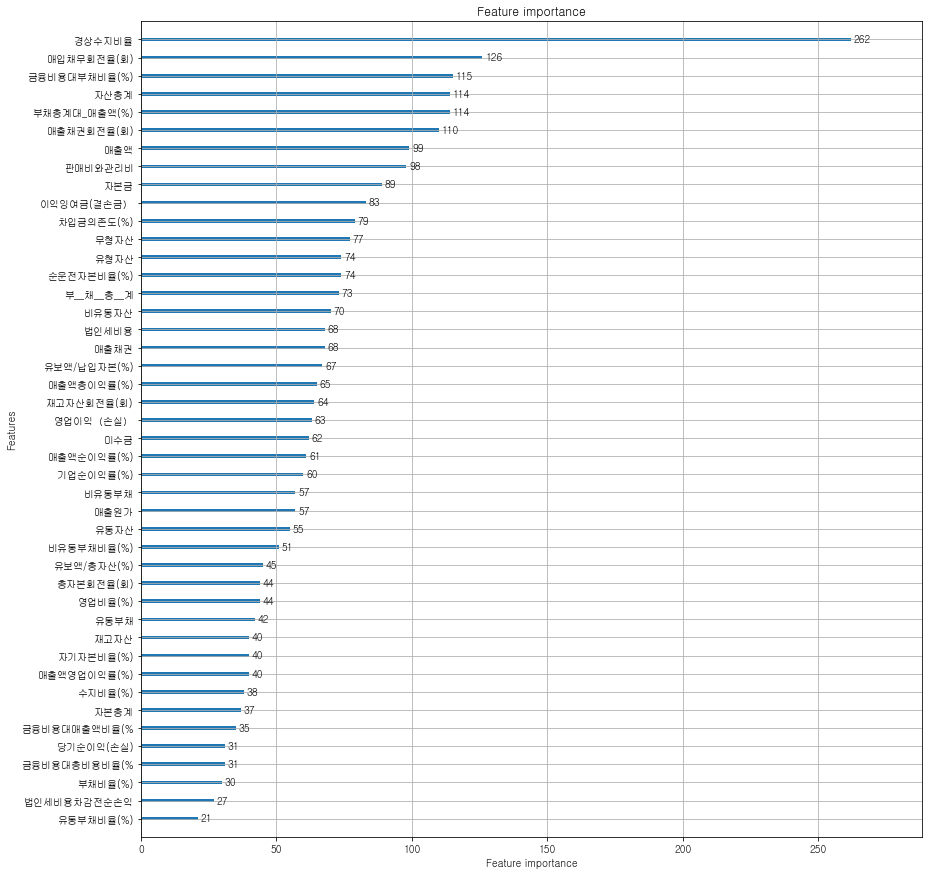

In [20]:
fig, ax = plt.subplots(figsize=(14, 15))
plot_importance(model, ax = ax)

In [21]:
perm = PermutationImportance(model, random_state=42).fit(train_x, train_y)
# random_stat -> 난수 생성, 일정한 비교 기준점을 잡아줌 

print(eli5.format_as_text(explain_weights.explain_permutation_importance(perm, feature_names = train_x.columns.values)))

explain_weights.explain_permutation_importance(perm, feature_names = train_x.columns.values)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0616 ± 0.0013  자산총계
0.0411 ± 0.0007  경상수지비율
0.0139 ± 0.0005  매출액
0.0114 ± 0.0015  매입채무회전율(회)
0.0075 ± 0.0007  매출채권회전율(회)
0.0052 ± 0.0005  부채총계대 매출액(%)
0.0051 ± 0.0008  금융비용대부채비율(%)
0.0041 ± 0.0004  자본금
0.0040 ± 0.0004  무형자산
0.0035 ± 0.0005  판매비와관리비
0.0031 ± 0.0006  이익잉여금(결손금）
0.0028 ± 0.0006  매출채권
0.0026 ± 0.0001  부  채  총  계
0.0025 ± 0.0005  유형자산
0.0024 ± 0.0003  차입금의존도(%)
0.0022 ± 0.0005  매출액순이익률(%)
0.0021 ± 0.0003  비유동부채
0.0021 ± 0.0005  비유동자산
0.0021 ± 0.0004  매출액총이익률(%)
0.0020 ± 0.0004  기업순이익률(%)
         … 24 more …         


Weight,Feature
0.0616 ± 0.0013,자산총계
0.0411 ± 0.0007,경상수지비율
0.0139 ± 0.0005,매출액
0.0114 ± 0.0015,매입채무회전율(회)
0.0075 ± 0.0007,매출채권회전율(회)
0.0052 ± 0.0005,부채총계대 매출액(%)
0.0051 ± 0.0008,금융비용대부채비율(%)
0.0041 ± 0.0004,자본금
0.0040 ± 0.0004,무형자산
0.0035 ± 0.0005,판매비와관리비


In [22]:
train_x.columns.values

array(['경상수지비율', '금융비용대매출액비율(%', '금융비용대부채비율(%)', '금융비용대총비용비율(%',
       '기업순이익률(%)', '당기순이익(손실)', '매입채무회전율(회)', '매출액', '매출액순이익률(%)',
       '매출액영업이익률(%)', '매출액총이익률(%)', '매출원가', '매출채권', '매출채권회전율(회)', '무형자산',
       '미수금', '법인세비용', '법인세비용차감전순손익', '부  채  총  계', '부채비율(%)',
       '부채총계대 매출액(%)', '비유동부채', '비유동부채비율(%)', '비유동자산', '수지비율(%)',
       '순운전자본비율(%)', '영업비율(%)', '영업이익（손실）', '유동부채', '유동부채비율(%)', '유동자산',
       '유보액/납입자본(%)', '유보액/총자산(%)', '유형자산', '이익잉여금(결손금）', '자기자본비율(%)',
       '자본금', '자본총계', '자산총계', '재고자산', '재고자산회전율(회)', '차입금의존도(%)',
       '총자본회전율(회)', '판매비와관리비'], dtype=object)

In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(test_y, pred)
print(f1)

0.8420720151610865


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(pred, test_y)

array([[7095,  350],
       [ 150, 1333]], dtype=int64)

: 

In [1]:
iris_df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
iris_df.rename(columns={'sepal.length': 'sepal_length',
                        'sepal.width': 'sepal_width',
                        'petal.length':'petal_length',
                        'petal.width':'petal_width'}, inplace=True)
iris_df.head()


le = LabelEncoder()
iris_df['variety'] = le.fit_transform(iris_df['variety'])

X = iris_df.drop(['variety'], axis=1)
y = iris_df.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(accuracy_score(pred, y_test))

plot_importance(model)

NameError: name 'pd' is not defined